# Explicación de un modelo de regresión lineal

Antes de utilizar los valores de Shapley para explicar modelos complicados, es útil entender cómo funcionan para modelos simples. Uno de los tipos de modelos más simples es la regresión lineal estándar, y a continuación entrenamos un modelo de regresión lineal en el [conjunto de datos de viviendas de California](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). 

Este conjunto de datos consta de 20,640 bloques de casas en California en 1990, donde nuestro objetivo es predecir el logaritmo natural del precio medio de la vivienda a partir de 8 características diferentes:

1. `MedInc` - ingreso medio en el grupo de bloques
2. `HouseAge` - edad media de la vivienda en el grupo de bloques
3. `AveRooms` - número medio de habitaciones por hogar
4. `AveBedrms` - número medio de dormitorios por hogar
5. `Población` - población del grupo de bloques
6. `AveOccup` - número medio de miembros por hogar
7. `Latitud` - latitud del grupo de bloques
8. `Longitud` - longitud del grupo de bloques

## Conjunto de Datos de Viviendas en California

Este es un conjunto de datos obtenido del repositorio StatLib. Aquí se incluye la descripción correspondiente:

Datos de Cartas S&P

Recopilamos información sobre las variables utilizando todos los grupos de bloques en California del Censo de 1990. En esta muestra, un grupo de bloques incluye en promedio a 1425.5 individuos que viven en un área geográficamente compacta. 
* Naturalmente, el área geográfica incluida varía inversamente con la densidad de población. 
* Calculamos distancias entre los centroides de cada grupo de bloques, medidas en latitud y longitud. 
* Excluimos todos los grupos de bloques que informaron cero entradas para las variables independientes y dependientes. 
* Los datos finales contenían 20,640 observaciones sobre 9 variables. 
* La variable dependiente es el $ln((valor medio de la vivienda))$.

```
                                Bols    tols
INTERCEPT                       11.4939 275.7518
MEDIAN INCOME                   0.4790  45.7768
MEDIAN INCOME2                  -0.0166 -9.4841
MEDIAN INCOME3                  -0.0002 -1.9157
ln(MEDIAN AGE)                  0.1570  33.6123
ln(TOTAL ROOMS/ POPULATION)     -0.8582 -56.1280
ln(BEDROOMS/ POPULATION)        0.8043  38.0685
ln(POPULATION/ HOUSEHOLDS)      -0.4077 -20.8762
ln(HOUSEHOLDS)                  0.0477  13.0792

```

El archivo contiene todas las variables. Específicamente, incluye el valor medio de la vivienda, ingreso medio, edad media de la vivienda, total de habitaciones, total de dormitorios, población, hogares, latitud y longitud, en ese orden.

**Referencia**

Pace, R. Kelley y Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

El manuscrito que describe los datos se puede encontrar en [www.spatial-statistics.com](http://www.spatial-statistics.com/). Los datos también están disponibles como archivos de Matlab.

Contacte a [kelley@spatial-statistics.com](mailto:kelley@spatial-statistics.com) o [kelley@pace.am](mailto:kelley@pace.am) si tiene alguna pregunta adicional. Gracias.

- Fuente: [Repositorio StatLib](http://lib.stat.cmu.edu/).
- Características: 20,460 casos, 8 atributos (0 nominales, 8 continuos).
- Descarga: [cal_housing.tgz](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz) (441963 bytes)

## Instalación de dependecias
Para este laboratorio vamos a usar python 3.9.17

In [3]:
!python --version

Python 3.9.17


In [2]:
#@title Liberías
!pip install ipywidgets numpy pandas scikit-learn interpret xgboost

  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached numpy-1.26.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached interpret-0.4.4-py3-none-any.whl.metadata (1.1 kB)
  Using cached xgboost-2.0.2-py3-none-manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata (4.1 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached scipy-1.11.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-

Debemos instalar la version v0.42.1 de Shap

In [29]:
!pip install shap==0.42.1

In [30]:
!pip show shap

Name: shap
Version: 0.42.1
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: /home/fredy/unal/proyecto-shap/.venv/lib/python3.9/site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm
Required-by: 


In [1]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


E instalar la version v3.5.3 de Matplotlib para evitar [errores de visualización](https://shap.readthedocs.io/en/latest/release_notes.html#release-v0-42-1)

In [8]:
!pip install matplotlib==3.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 5.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0


In [2]:
!pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/fredy/unal/proyecto-shap/.venv/lib/python3.9/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: lime, SALib


## Obtención de conjunto de datos

In [66]:
import shap
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

**`X` (Matriz de características):** Es una matriz que contiene información sobre las características o variables independientes del conjunto de datos. Cada fila de la matriz representa una observación, y cada columna representa una característica específica. En el contexto del conjunto de datos de California, las características podrían incluir información como ingreso medio, edad de la vivienda, número medio de habitaciones por hogar, etc.

In [67]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [68]:
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
...,...,...,...,...,...,...,...,...
6232,3.3523,25.0,4.997245,1.112948,1187.0,3.269972,34.07,-117.94
2782,1.2049,17.0,4.337500,1.206250,775.0,2.421875,32.74,-114.66
12601,1.9837,37.0,4.786517,1.014045,902.0,2.533708,38.53,-121.48
2198,7.5000,8.0,6.564885,0.946565,1111.0,2.826972,36.85,-119.88


In [72]:
# Obtener la fila #20
indice_muestra = 20
X.iloc[indice_muestra]

MedInc           2.585900
HouseAge        17.000000
AveRooms         4.814634
AveBedrms        1.030894
Population    1911.000000
AveOccup         3.107317
Latitude        32.570000
Longitude     -117.070000
Name: 14770, dtype: float64

In [73]:
X.iloc[indice_muestra]["MedInc"]

2.5859

**`y` (Variable de respuesta):** Es un vector que contiene los valores de la variable dependiente que estamos tratando de predecir. En el caso del conjunto de datos de California, podría ser el precio medio de la vivienda u otra medida relacionada.

In [52]:
import pandas as pd
y_df = pd.DataFrame(y)
y_df

,0
0,1.369
1,2.413
2,2.007
3,0.725
4,4.600
...,...
995,1.855
996,1.058
997,3.435
998,2.259


In [61]:
# Obtener la muestra de índice #20 de `y_df`
y_df.iloc[indice_muestra]

0    1.314
Name: 20, dtype: float64

En resumen, `X` contiene las características que se utilizan para hacer predicciones, y `y` contiene las respuestas reales (etiquetas) asociadas con esas características en el conjunto de datos.

## Modelo de regresión lineal simple

En modelos de regresión, especialmente cuando se trabaja con valores que abarcan un rango amplio, como los precios de las viviendas, es común aplicar transformaciones a la variable de respuesta para abordar problemas de sesgo o heterocedasticidad. En este caso, se está utilizando el **logaritmo natural** ($ln$) del precio medio de la vivienda como la variable objetivo.

La transformación logarítmica se elige por varias razones:

1. **Estabilización de la Varianza:** La transformación logarítmica puede ayudar a estabilizar la varianza cuando esta aumenta con el nivel de la variable.
2. **Manejo de Sesgo:** Si la distribución de la variable objetivo está sesgada, la transformación logarítmica puede ayudar a reducir ese sesgo.
3. **Interpretación más Lineal:** La relación entre las variables predictoras y la variable objetivo puede volverse más lineal después de aplicar una transformación logarítmica.

In [8]:
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

## Examinando los coeficientes del modelo

La forma más común de comprender un modelo lineal es examinar los coeficientes aprendidos para cada característica. Estos coeficientes nos indican cuánto cambia la salida del modelo cuando cambiamos cada una de las características de entrada:

In [9]:
print("Coeficientes del modelo:\\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Coeficientes del modelo:\n
MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


Aquí está una explicación de cada coeficiente:

1. **MedInc (Ingreso Medio):** 0.45769
    - A medida que el ingreso medio en el grupo de bloques aumenta en una unidad, el logaritmo natural del precio medio de la vivienda aumenta en aproximadamente 0.45769 unidades.
2. **HouseAge (Edad Media de la Vivienda):** 0.01153
    - Un aumento de una unidad en la edad media de la vivienda en el grupo de bloques se asocia con un aumento de aproximadamente 0.01153 en el logaritmo natural del precio medio de la vivienda.
3. **AveRooms (Número Medio de Habitaciones por Hogar):** -0.12529
    - Un incremento de una unidad en el número medio de habitaciones por hogar se relaciona con una disminución de aproximadamente 0.12529 en el logaritmo natural del precio medio de la vivienda.
4. **AveBedrms (Número Medio de Dormitorios por Hogar):** 1.04053
    - Aumentar en una unidad el número medio de dormitorios por hogar está asociado con un aumento de aproximadamente 1.04053 en el logaritmo natural del precio medio de la vivienda.
5. **Population (Población):** 5e-05 (0.00005)
    - Cada aumento de una unidad en la población del grupo de bloques se asocia con un aumento muy pequeño, de aproximadamente 0.00005, en el logaritmo natural del precio medio de la vivienda.
6. **AveOccup (Número Medio de Miembros por Hogar):** -0.29795
    - Un aumento de una unidad en el número medio de miembros por hogar está relacionado con una disminución de aproximadamente 0.29795 en el logaritmo natural del precio medio de la vivienda.
7. **Latitude (Latitud):** -0.41204
    - Un aumento de una unidad en la latitud del grupo de bloques se asocia con una disminución de aproximadamente 0.41204 en el logaritmo natural del precio medio de la vivienda.
8. **Longitude (Longitud):** -0.40125
    - Un aumento de una unidad en la longitud del grupo de bloques se relaciona con una disminución de aproximadamente 0.40125 en el logaritmo natural del precio medio de la vivienda.

Estos coeficientes indican cómo cada característica contribuye a la predicción del precio de la vivienda en el modelo de regresión lineal. Un coeficiente positivo sugiere una asociación positiva, mientras que un coeficiente negativo sugiere una asociación negativa. Es importante considerar la magnitud de los coeficientes para evaluar la fuerza de la influencia de cada característica en la predicción.

Si bien los coeficientes son útiles para indicarnos qué sucederá cuando cambiamos el valor de una característica de entrada, por sí solos no son una excelente manera de medir la importancia general de una característica. Esto se debe a que el valor de cada coeficiente depende de la escala de las características de entrada. 

Por ejemplo, si midieramos la edad de una casa en minutos en lugar de años, entonces los coeficientes para la característica HouseAge se convertirían en 0.0115 / (365∗24∗60) = 2.18e-8. Claramente, el número de años desde que se construyó una casa no es más importante que el número de minutos, sin embargo, su valor de coeficiente es mucho mayor. Esto significa que la magnitud de un coeficiente no es  necesariamente una buena medida de la importancia de una característica en un modelo lineal.

<https://scikit-learn.org/stable/modules/partial_dependence.html>

### Una imagen más completa mediante gráficos de dependencia parcial

Para comprender la importancia de una característica en un modelo, es necesario entender tanto cómo el cambio en esa característica afecta la salida del modelo, como también la distribución de los valores de esa característica. Para visualizar esto en un modelo lineal, podemos construir un gráfico de dependencia parcial clásico y mostrar la distribución de los valores de la característica como un histograma en el eje x:

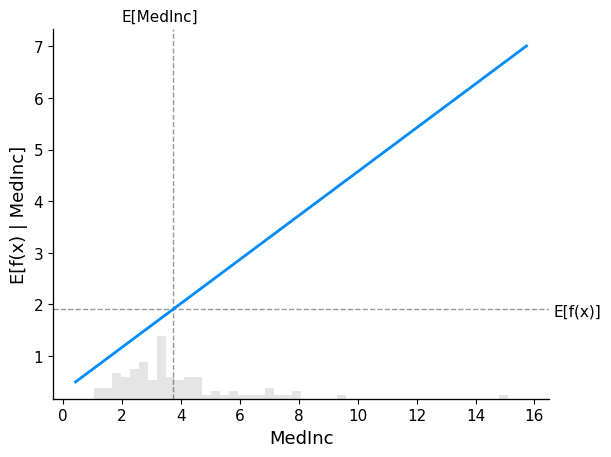

In [77]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

Estas expresiones están relacionadas con conceptos estadísticos y matemáticos. Aquí está el significado de cada una:

1. Línea gris horizontal **$E[f(x)]$:** En el gráfico, hay una línea horizontal gris que representa el valor esperado del modelo aplicado al conjunto de datos de viviendas de California. $E[f(x)]$ se refiere a la esperanza matemática o el valor esperado de la función de predicción del modelo $f(x)$. La esperanza matemática es una medida de tendencia central que representa el valor medio de una función ponderado por la probabilidad de cada valor en el dominio de la función. Matemáticamente, se define como:

   $$ E[f(x)] = \int_{-\infty}^{\infty} f(x) \cdot p(x) \,dx $$

   Donde $p(x)$ es la función de densidad de probabilidad de la variable aleatoria $x$. En el contexto de modelos estadísticos o de aprendizaje automático, $f(x)$ podría ser la función de predicción del modelo para una variable de interés $x$.

2. Línea gris vertical **$E[\text(MedInc)]$:** La línea vertical gris representa el valor promedio de la característica "MedInc". En este caso, se está calculando el valor esperado de la variable $\text(MedInc)$, que representa el ingreso medio. La expresión se interpreta como el promedio ponderado del ingreso medio en el conjunto de datos, donde cada valor de ingreso se pondera por su probabilidad de ocurrencia.

   $$ E[\text(MedInc)] = \int_{-\infty}^{\infty} \text(MedInc) \cdot p(\text(MedInc)) \,d \text(MedInc)$$

3. La intersección de estas dos líneas se considera el "centro" del gráfico de dependencia parcial con respecto a la distribución de datos.

4. Línea azul **$E[f(x) | \text(MedInc)]$:** La línea azul en el gráfico de dependencia parcial muestra el valor promedio de la salida del modelo cuando se fija la característica "MedInc" a un valor específico. $E[f(x) | \text(MedInc)]$ representa la esperanza condicional de la función $f(x)$ dado un valor específico de $\text(MedInc)$. En otras palabras, es el valor esperado de la función de predicción condicionado a que $\text(MedInc)$ tiene un valor particular. Matemáticamente, se define como:

   $$ E[f(x) | \text(MedInc)] = \int_{-\infty}^{\infty} f(x) \cdot p(x | \text(MedInc)) \,dx $$

   Donde $p(x | \text(MedInc))$ es la función de densidad de probabilidad condicional de $x$ dado un valor específico de $\text(MedInc)$.

## Leyendo valores SHAP desde gráficos de dependencia parcial

La idea central detrás de las explicaciones basadas en valores SHAP (Shapley) de modelos de aprendizaje automático es utilizar resultados de asignación justa de la teoría de juegos cooperativos para asignar crédito a la salida de un modelo entre sus características de entrada. 

Para evaluar un modelo existente cuando solo un subconjunto de características forma parte del modelo, integramos las otras características utilizando una formulación de valor esperado condicional. Esta formulación puede tomar dos formas:

$$ E[f(x) | X_s = x_s] $$

o

$$ E[f(x) | do(X_s = x_s)] $$

En la primera forma, conocemos los valores de las características en $S$ porque los *observamos*. En la segunda forma, conocemos los valores de las características en $S$ porque los *configuramos*. 

En general, la segunda forma suele ser preferible, tanto porque nos dice cómo se comportaría el modelo si interviniéramos y cambiáramos sus entradas, como porque es mucho más fácil de calcular. En este tutorial nos centraremos exclusivamente en la segunda formulación. 

También utilizaremos el término más específico "valores SHAP" para referirnos a los valores Shapley aplicados a una función de expectativa condicional de un modelo de aprendizaje automático.

Los valores SHAP pueden ser muy complicados de calcular (en general, son NP-duros), pero los modelos lineales son tan simples que podemos leer los valores SHAP directamente de un gráfico de dependencia parcial. 

Cuando estamos explicando una predicción, el valor SHAP para una característica específica es simplemente la diferencia entre la salida esperada del modelo y el gráfico de dependencia parcial en el valor de esa característica:

In [11]:
# calcular los valores SHAP para el modelo lineal
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

Exact explainer: 1001it [00:57, 17.52it/s]                         


Valores de SHAP del `Explainer`: Notamos las valores SHAP para cada característica en cada una de las 1000 muestras

In [45]:
shap_values_values = pd.DataFrame(shap_values.values)
shap_values_values

,0,1,2,3,4,5,6,7
0,0.177486,-0.056737,-0.011157,-0.036885,0.002520,-0.325451,1.465572,-1.094370
1,0.870327,0.046609,-0.062721,-0.134957,-0.005628,-0.022839,0.839339,-0.668671
2,0.261293,0.015605,-0.042229,-0.069582,0.002616,0.006092,-1.371170,1.122040
3,-0.546383,0.098282,0.066640,0.123388,-0.034577,0.048794,1.175823,-1.765308
4,0.540591,-0.025733,0.144854,-0.060713,-0.026301,0.318646,-0.969259,1.395043
...,...,...,...,...,...,...,...,...
995,0.859005,-0.139414,-0.058518,-0.100188,-0.010261,-0.087794,0.787932,-0.812113
996,-0.809678,-0.025733,0.149502,-0.040431,0.000155,0.264946,-0.772977,-0.474330
997,1.338946,-0.118745,-0.314231,-0.058913,-0.006395,-0.060209,-0.945892,1.163685
998,0.067588,-0.149748,0.167049,0.019295,-0.024352,0.309156,-0.721570,1.140549


Valor base del `Explainer`: Notamos que es constante para todas las muestras

In [48]:
shap_values_base_value = pd.DataFrame(shap_values.base_values)
shap_values_base_value

,0
0,1.903534
1,1.903534
2,1.903534
3,1.903534
4,1.903534
...,...
995,1.903534
996,1.903534
997,1.903534
998,1.903534


Datos del `Explainer`: Son los valores de las caracteristicas de cada una de las 1000 muestras. Es lo mismo que `X`.

In [47]:
shap_values_data = pd.DataFrame(shap_values.data)
shap_values_data

,0,1,2,3,4,5,6,7
0,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
1,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
2,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
3,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
4,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
995,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
996,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
997,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
998,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


Los valores de SHAP, el valor esperado y los datos reales para la muestra 20.



In [50]:
indice_muestra = 20
# Seleccionar la fila 20 y todas las columnas
shap_values[indice_muestra : indice_muestra + 1, :]

.values =
array([[-0.48900816, -0.10840999,  0.08734303, -0.06647713,  0.01402258,
        -0.04536997,  1.47024547, -1.08511549]])

.base_values =
array([1.90353381])

.data =
array([[ 2.58590000e+00,  1.70000000e+01,  4.81463415e+00,
         1.03089431e+00,  1.91100000e+03,  3.10731707e+00,
         3.25700000e+01, -1.17070000e+02]])

Valor esperado de "MedInc", $E[\text(MedInc)]$

In [94]:
shap_values[:, "MedInc"].data.mean()


3.7973327

In [96]:
import numpy as np
np.mean(shap_values[:, "MedInc"].data)


3.7973327

In [100]:
shap_values[:, "MedInc"].values.mean()

0.026614098863867376

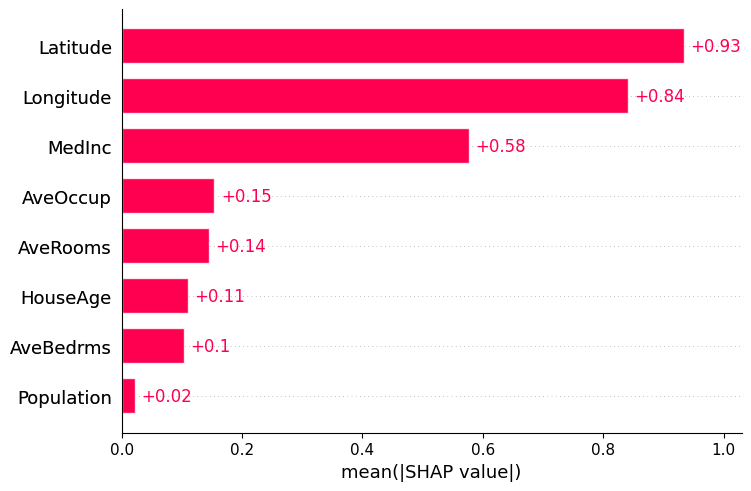

In [98]:
shap.plots.bar(shap_values)

Los valores de SHAP, el valor esperado y los datos reales de la característica "MedInc" para la muestra 20.



In [74]:
# Seleccionar la fila 20 y todas la columna de `MedInc`
shap_values[indice_muestra : indice_muestra + 1, "MedInc"]

.values =
array([-0.48900816])

.base_values =
array([1.90353381])

.data =
array([2.5859])

1. **`.values = -0.48900816171264905`:** Este es el valor específico del SHAP para la característica "MedInc" en la muestra 20. Indica la contribución de la característica "MedInc" en la predicción del modelo para la observación 20. Un valor negativo sugiere que la presencia de "MedInc" en la muestra 20 ha disminuido la predicción del modelo.

2. **`.base_values = 1.9035338119654108`:** Este es el valor base o el valor de referencia para la salida del modelo. Es el valor esperado de la salida del modelo cuando no se considera ninguna característica específica. En este caso, es el valor esperado del modelo para la muestra 20 sin tener en cuenta la característica "MedInc".

3. **`.data = 2.5859`:** Este es el valor específico de la característica "MedInc" en la muestra 20. Indica el valor real de "MedInc" en la observación 20. Es lo mismo que `X.iloc[indice_muestra]["MedInc"]`

En resumen, estos valores SHAP proporcionan información sobre cómo la presencia específica de la característica "MedInc" en la muestra 20 afecta la predicción del modelo en comparación con el valor base de referencia. El valor SHAP negativo sugiere que la presencia de "MedInc" en esta muestra específica ha disminuido la predicción del modelo en comparación con la expectativa.

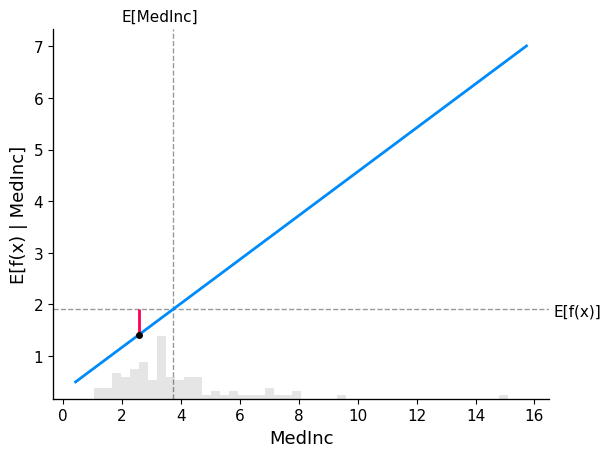

In [75]:
# hacer un gráfico de dependencia parcial estándar
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[indice_muestra : indice_muestra + 1, :],
)

En este código, se están calculando los valores SHAP para un modelo lineal y luego se utiliza un gráfico de dependencia parcial estándar para visualizar la contribución de la característica "MedInc" a la predicción del modelo. El valor SHAP para esta característica en particular se puede extraer directamente de este gráfico. Este enfoque simplificado es posible debido a la simplicidad de los modelos lineales.

La estrecha correspondencia entre el clásico gráfico de dependencia parcial y los valores SHAP significa que si representamos gráficamente el valor SHAP para una característica específica en todo un conjunto de datos, trazaremos exactamente una versión centrada en la media del gráfico de dependencia parcial para esa característica:

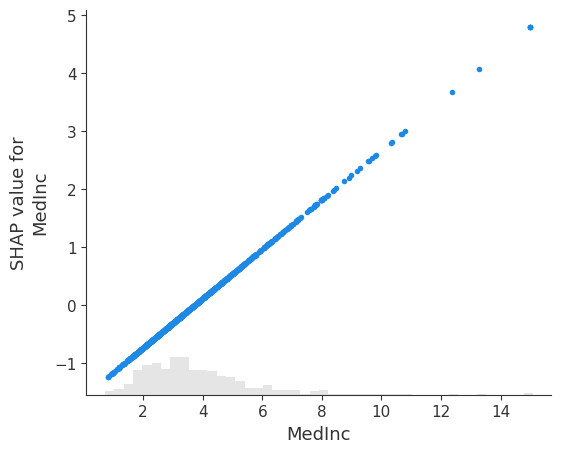

In [13]:
shap.plots.scatter(shap_values[:, "MedInc"])

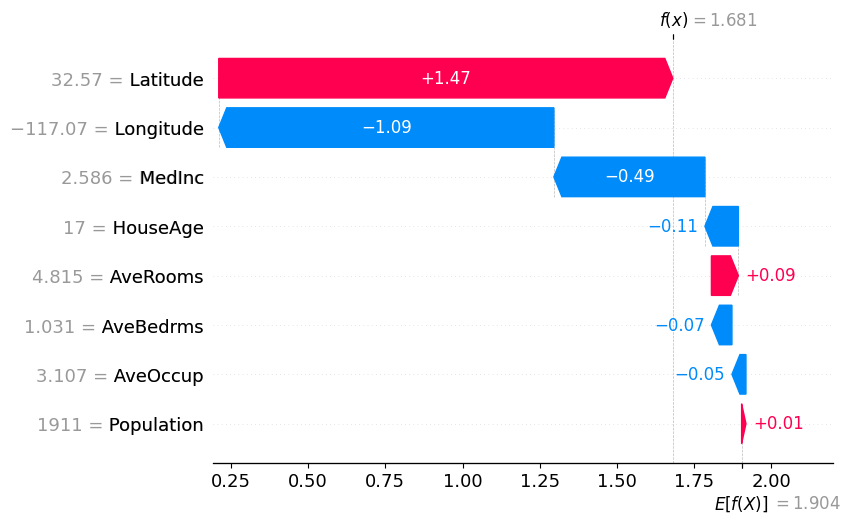

In [102]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[20], max_display=14)